# Week 2 - Polynomial Curve Fitting and Decision Theory

Learning contents:

1. Linear models
    - Linear function
    - Error function
    - Root meant square error
    - Optimization of Error function
    - Test the model
2. Regularization
    - Error function
    - Optimization
    - Test with regularization
3. Model Selection
    - Cross-validation
4. Bayesian curve fitting
    - Display results

## Description

In this exercise we will apply Linear Models for Polynomial Curve Fitting task.

You have to fill empty functions (with pass in body) to match their purpose.

1. You have to create a code for evaluation of a Linear Model, it's error functions and finding optimal weights with given error functions.
2. You need to add regularization to the optimization procedure.
3. You need to implement Cross-validation model selection technique.
4. You need to implement Bayesian curve fitting, computing phi and S matricies at first, then using them to compute mean and variance.

## Dependencies

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import  exp

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

In [30]:
def target_func(x): return np.sin(2*np.pi*x)

def generate_data(size):
    rng = np.random.RandomState(26052605)
    x_train = rng.uniform(0., 1., size)
    y_train = target_func(x_train) + rng.normal(scale=0.1, size=size)
    x_test = np.linspace(0., 1., size) # x training set should be the same size as the target size for me to compare it? 
                                       # I have Changed length to be of length = size
    y_test = target_func(x_test)
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = generate_data(10)

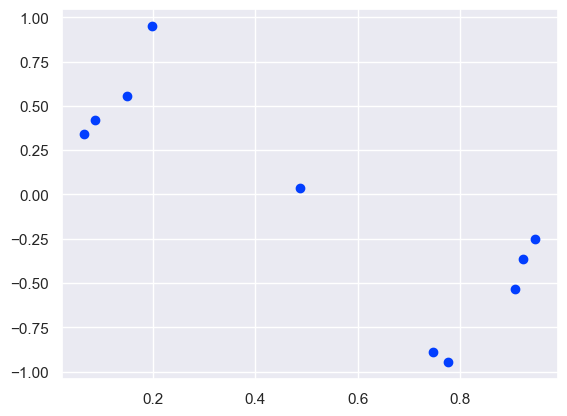

In [31]:
plt.scatter(x_train, y_train)

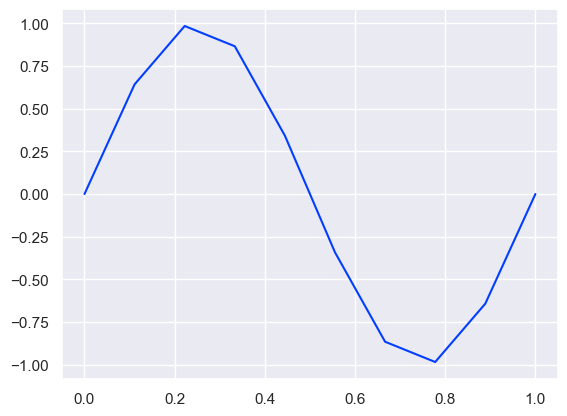

In [32]:
plt.plot(x_test, y_test, '-')

## 1) Linear models

### 1.1) Linear function

Complete the function below, named `linear`, which takes two parameters: a single data point `x` and a list of `M` number of `weights`. The function should return an output value `y` as given in the equation on slide 6 of Lecture 3. In essence, this function should implement a polynomial of order `M`.   

In [33]:
def linear(x, weights):   # w_j * (x^j) 
    """
    xv = [x^0, x^1, x^2, ..., x^M] \n
    w = [w0, w1, w2, ..., wM] \n
    y(xv, w) = xvT.w
    """
    x = np.vander(x = np.array([x]), N = weights.shape[0], increasing=True)[0] # x = [x^0, x^1, x^2, x^3, x^4]
    y = np.vdot(x, weights) # xT.w
    return y

linear(3, np.array([0.1, 0.2, 0.5, 0.2]))

np.float64(10.6)

### 1.2) Error function

Complete the function below, named `err`, that computes the sum-of-squared error between the output of the function above and the corresponding target value. Specifically, the function should implement the error equation in slide 7 of Lecture 3. The function takes `weights`, `inputs` and `targets` as parameters

In [34]:

def err(weights, inputs, targets): # 1/2 * sum(n=1 -> N ((y - t)^2)) 
    y = np.array([linear(x, weights) for x in inputs])

    v = y - targets                 #  y - t
    v2 = v.dot(v)                   # (y - t)^2 
    ew = 0.5 * v2                   # 1/2 * (y - t)^2 
    return ew

err(np.array([0.1, 0.2]), x_test, y_test)

np.float64(2.745118112315833)

### 1.3) Root meant square error

Write a function for computing the root mean squared error as given in the equation in slide 12 of Lecture 3

In [35]:
def erms(weights, inputs, targets):
    N = len(inputs)
    Ew = err(weights, inputs, targets)
    return np.sqrt(2*Ew/N)

erms(np.array([0.1, 0.2]), x_test, y_test)

np.float64(0.7409612827018471)

### 1.4) Optimization of Error function

Create a function below that obtains `optimial_weights` by implementing the optimization solution given in slide 9 of Lecture 3. The function takes the following parameters: `inputs`, `targets`, and `M` (number of weights) as parameters and returns optimal weights for the given set of training data.

In [36]:
def optimial_weights(inputs, targets, M):
    X = np.vander(inputs, M + 1,  increasing=True) # X in R ^(N x M) N rows M columns was written on page 9 of lecture 3. 
    # print(inputs)
    # print(X)
                            # Notes for myself:
                            # X.T @ X  :  R ^(M x p) @ R ^ (p x N) is R ^ (M x N):    R^(3 x 10) @ R^(10 x 3) -> R^(3 x 3)
    w_optimal = np.linalg.inv(X.T @ X) @ (X.T) @ targets  
    return w_optimal
optimial_weights(x_train, y_train, 9)

array([-1.51231830e+00,  6.19413191e+01, -7.27039528e+02,  3.59589446e+03,
       -4.32390378e+03, -2.02007671e+04,  7.93626142e+04, -1.15263708e+05,
        7.79949044e+04, -2.05013090e+04])

### 1.5) Test the model

Go through the following code and try to understand its functionality. After that, run the code and interpret the resulting figure.

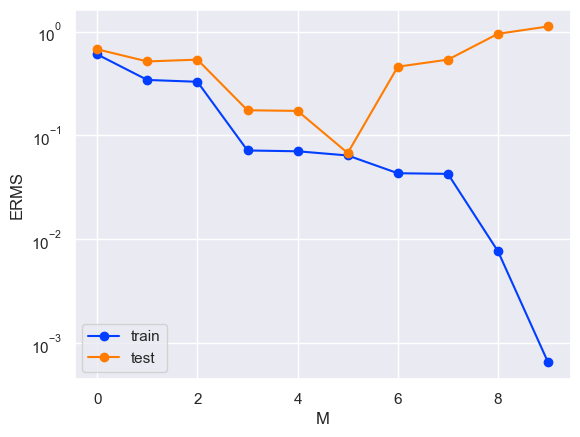

In [37]:
def test_all(start_M, end_M, x_train, y_train, x_test, y_test):
    
    results_train = []
    results_test = []
    all_weights = []
    
    for M in range(start_M, end_M + 1):
        weights = optimial_weights(x_train, y_train, M)
        all_weights.append(weights)
        error_train = erms(weights, x_train, y_train)
        error_test = erms(weights, x_test, y_test)
        results_train.append(error_train)
        results_test.append(error_test)
    return results_train, results_test, all_weights

r_tr, r_tt, all_weights = test_all(0, 9, x_train, y_train, x_test, y_test)

plt.plot(list(range(0, 10)), r_tr, '-o', label='train')
plt.plot(list(range(0, 10)), r_tt, '-o', label='test')
plt.xlabel('M')
plt.ylabel('ERMS')
plt.legend()
plt.yscale('log')

##### Weights table for different `M`

The following code lists the optimal weight vectors obtained for different model order `M` values. Explain what happens to the weights at large values of `M`.

In [38]:
print(pd.DataFrame(all_weights))

          0           1            2             3             4  \
0 -0.067444         NaN          NaN           NaN           NaN   
1  0.674906   -1.403250          NaN           NaN           NaN   
2  0.870601   -2.937208     1.521622           NaN           NaN   
3 -0.348533   11.654727   -33.094539     22.088529           NaN   
4 -0.274931   10.447965   -27.877273     14.161034      3.897826   
5  0.052313    2.957062    24.077616   -126.364847    164.358999   
6  1.343704  -29.263446   282.780626  -1019.109560   1661.058604   
7  1.660030  -39.466944   401.665733  -1667.825743   3460.280318   
8 -2.481421  104.655900 -1466.529786  10137.052544 -36816.524550   
9 -1.512318   61.941319  -727.039528   3595.894462  -4323.903778   

              5             6              7             8             9  
0           NaN           NaN            NaN           NaN           NaN  
1           NaN           NaN            NaN           NaN           NaN  
2           NaN           

##### Estimated curve for `M=9` (same as the amount of data points) 

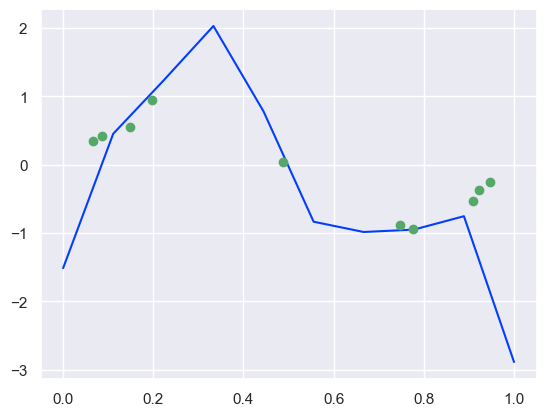

In [39]:
plt.plot(x_test, list(map(lambda x: linear(x, optimial_weights(x_train, y_train, 9)), x_test)), '-')
plt.plot(x_train, y_train, 'og')

## 2) Regularization

### 2.1) Error function

Implement the cost function `err_regularization` that takes into account the regularization term, as given in the equation on slide 16 of Lecture 3. The function should take `weights`, `inputs`, `targets` and `l` (lambda regularization term) as input parameters and compute sum-of-squared error with weight regularization.

In [40]:
def err_regularization(weights, inputs, targets, l):
    """ 
    Etilde(w) = 1/2 * sum(n + 1 -> N ( y(xn, w) - tn)^2 + lambda/2 * w.w)
    """
    # I have already made the first part with my error function from previous: 
    Etildew = err(weights, inputs, targets) + (l/2) * (weights.dot(weights))
    return Etildew

Write the `erms_regularization` function which is regularization version of a root mean squared error (slide 12 in lecture 3)

In [41]:
def erms_regularization(weights, inputs, targets, l):
    """
    E_RMS = √(2*Etilde(w)/N)
    """    
    Etilde = err_regularization(weights, inputs, targets, l)
    N = len(inputs)
    ERMS = np.sqrt(2*Etilde/N)
    return ERMS

### 2.2) Optimization

Create a function below that obtains `optimial_weights` by implementing the optimization solution of the regularized problem as given in slide 16 of Lecture 3. The function takes the following parameters: `inputs`, `targets`, `M` (number of weights) and `l` (regularization term) as parameters and returns optimal weights for the given set of training data.

In [42]:
def optimial_weights_regularization(inputs, targets, M, l):
    """
    w_optimal_reg = (lambdaI + XT.X)^(-1).XT.t
    """
    X = np.vander(inputs, M, increasing=True)
    w_optimal_reg = np.linalg.inv(l*np.eye(M) + X.T@X) @ X.T @ targets        # X in R^(10xM),   X.T in R^(Mx10),   XT.X in R^(M x M) => l*I in R^(M x M) 
    return w_optimal_reg
optimial_weights_regularization(x_train, x_test, 9, 0.1)

array([ 0.30040983,  0.60344892,  0.10444807, -0.04464274, -0.09387454,
       -0.11904979, -0.13585988, -0.14776944, -0.15609367])

### 2.3) Test with regularization

Go through the following code and try to understand its functionality. After that, run the code and interpret the resulting figures.

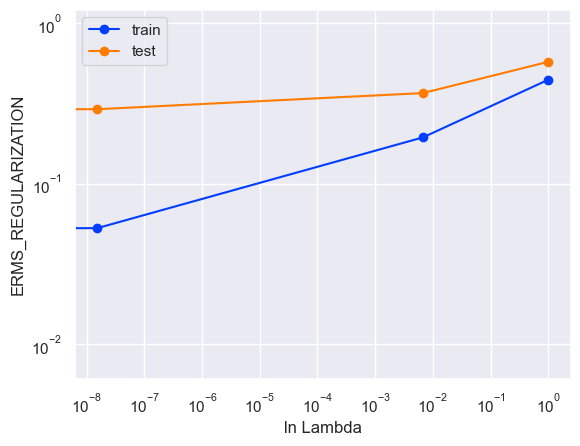

In [43]:
def test_all_regularization(ls, M, x_train, y_train, x_test, y_test):
    
    results_train = []
    results_test = []
    all_weights = []
    
    for l in ls:
        weights = optimial_weights_regularization(x_train, y_train, M, l)
        all_weights.append(weights)
        error_train = erms_regularization(weights, x_train, y_train, l)
        error_test = erms_regularization(weights, x_test, y_test, l)
        results_train.append(error_train)
        results_test.append(error_test)
    return results_train, results_test, all_weights

ls = [0, exp(-18), exp(-5), exp(0)]

r_tr_r, r_tt_r, all_weights_r = test_all_regularization(ls, 9, x_train, y_train, x_test, y_test)

plt.plot(ls, r_tr_r, '-o', label='train')
plt.plot(ls, r_tt_r, '-o', label='test')
plt.xlabel('ln Lambda')
plt.ylabel('ERMS_REGULARIZATION')
plt.legend()
plt.yscale('log')
plt.xscale('log')

##### Weights for `M=9` with regularization terms `0`, `exp(-18)`, `exp(-5)`, `exp(0)`

In [44]:
print(pd.DataFrame(np.transpose(all_weights_r)))

              0           1         2         3
0     -2.481421    0.682190  0.505634  0.327606
1    104.655900  -11.625613  0.764006 -0.386356
2  -1466.529786  123.081459 -2.569740 -0.347187
3  10137.052544 -357.433153 -2.013122 -0.224588
4 -36816.524550  267.740377 -0.768981 -0.117498
5  74258.824382  180.338651  0.285311 -0.035923
6 -84043.676125 -157.946542  1.037411  0.023824
7  50026.634579 -188.923626  1.531612  0.066612
8 -12199.369277  144.628938  1.829285  0.096538


In [45]:
def plot_by_lambda(l):
    plt.plot(x_test, y_test, '-m')
    plt.plot(x_test, list(map(lambda x: linear(x, optimial_weights_regularization(x_train, y_train, 9, l)), x_test)), '-')
    plt.plot(x_train, y_train, 'og')

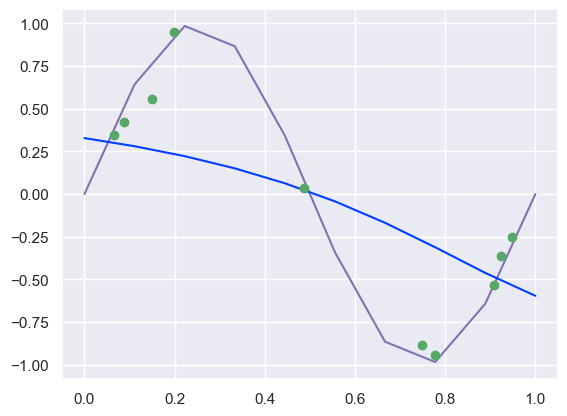

In [46]:
plot_by_lambda(exp(0))

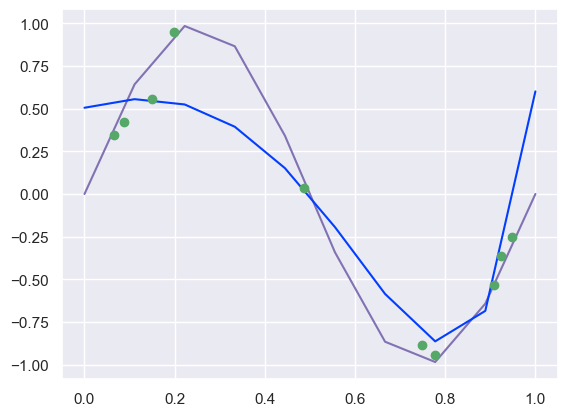

In [47]:
plot_by_lambda(exp(-5))

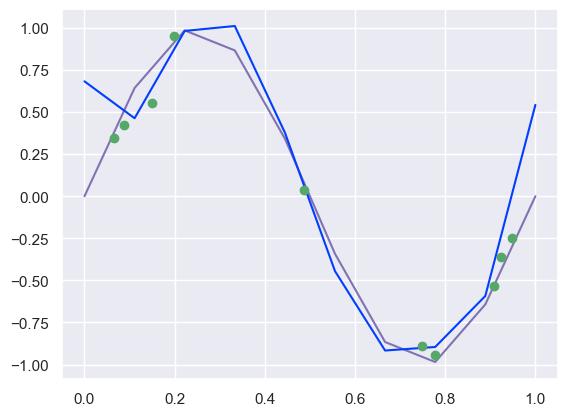

In [48]:
plot_by_lambda(exp(-18))

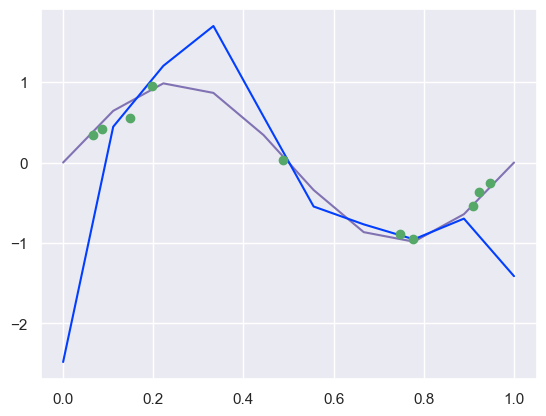

In [49]:
plot_by_lambda(0)

## 3) Model Selection

### 3.1) Cross-validation

Create a function named `create_cross_validation_sets` that takes `S` (number of sets) and training data points `x_train`, `y_train` as parameters and returns array of `S` number sets with each set in the form `[x_sub_train, y_sub_train, x_validation, y_validation]`. Refer to the figure in slide 20 of lecture 3.

In [50]:
def create_cross_validation_sets(S, x_train, y_train):
    # Del træningsdataet op i S mængder af sets. len(x_train) = 16 -> 4*x_sub_train(Heraf 1 til validation)
    # Jeg tester så S gange, og vælger så den model der er bedst. 
    n = len(x_train)
    
    # Shuffle the data
    indices = np.arange(n)
    np.random.shuffle(indices)  
    x_train_shuffled = x_train[indices]
    y_train_shuffled = y_train[indices]
   
    # For simplicity i just floor the size of each section and then have a larger section for validation 
    foldSize = np.floor(n/S).astype(int)
    validationSize = n%S if n%S != 0 else foldSize # If n is divisible by S then give the validation the size of a fold, else give it the rest.
    
    x_validation = 0 
    y_validation = 0
    x_sub_train = 0
    y_sub_train = 0
    
    cross_validation_sets = 0 # [x_sub, y_sub, x_vali, y_vali]
    for i in range(0, S): 
        startIdx = i * foldSize
        endIdx = startIdx + validationSize
        if i == 0:                                  # Initialization 
            x_validation = np.array([x_train_shuffled[startIdx: endIdx]])
            y_validation = np.array([y_train_shuffled[startIdx: endIdx]])
            x_sub_train = np.array([x_train_shuffled[endIdx:]])
            y_sub_train = np.array([y_train_shuffled[endIdx:]])
            continue
        # Methods for making splitting the content into validation data and sub_train data, and adding to the array.
        # StartIdx, index of first validation value, endIdx where the last validation value is.  
        add_validation = lambda arr, data : np.r_[arr, [data[startIdx:endIdx]]]
        # Everything outside of these bounds is for training: 
        add_sub_train = lambda arr, data: np.r_[arr, [np.concatenate([data[:startIdx], data[endIdx:]])]]
        
        x_validation = add_validation(x_validation, x_train_shuffled)
        y_validation = add_validation(y_validation, y_train_shuffled) 
            
        x_sub_train = add_sub_train(x_sub_train, x_train_shuffled)
        y_sub_train = add_sub_train(y_sub_train, y_train_shuffled)
    return (x_sub_train, y_sub_train, x_validation, y_validation)

create_cross_validation_sets(6, np.array([0, 2, 3, 1, 0, -1, 2, 3]), np.array([0, 2, 3, 1, 0, -1, 2, 3]))

(array([[-1,  3,  0,  1,  2,  0],
        [ 2,  3,  0,  1,  2,  0],
        [ 2,  3,  0,  1,  2,  0],
        [ 2,  3, -1,  1,  2,  0],
        [ 2,  3, -1,  3,  2,  0],
        [ 2,  3, -1,  3,  0,  0]]),
 array([[-1,  3,  0,  1,  2,  0],
        [ 2,  3,  0,  1,  2,  0],
        [ 2,  3,  0,  1,  2,  0],
        [ 2,  3, -1,  1,  2,  0],
        [ 2,  3, -1,  3,  2,  0],
        [ 2,  3, -1,  3,  0,  0]]),
 array([[ 2,  3],
        [ 3, -1],
        [-1,  3],
        [ 3,  0],
        [ 0,  1],
        [ 1,  2]]),
 array([[ 2,  3],
        [ 3, -1],
        [-1,  3],
        [ 3,  0],
        [ 0,  1],
        [ 1,  2]]))

Create the function, `best_model`, that loops through all integer values between `start_M`, `end_M` (low and high limits in search of optimal value of model order `M`), performs S-fold cross validation (as explained in lecture slides) and selects the best value `top_M` among all the considered values of M.  It also takes `ls` (a list of regularization parameters) and `sets` (cross-validation sets obtained from the output of previous function) and should return `(top_M, top_l, top_result_test)` with `M`, `l` and result for the best model.

M = 6 lambda = 0 erms = 0.1094322218485158


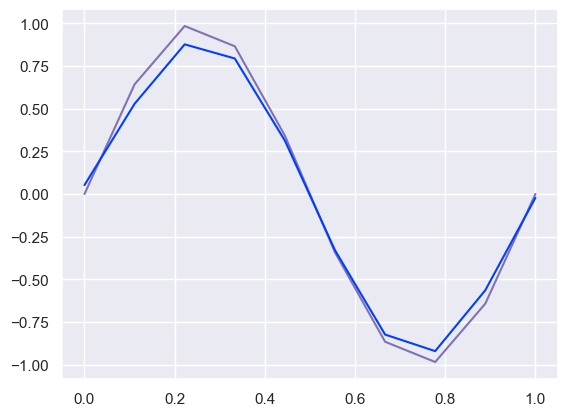

In [51]:
def best_model(start_M, end_M, ls, sets):
    """
    For m in start_M...end_M
        avg_validation_error 
        For l in 0...ls 
            validation_errors 
            optimal_weights(sets(x_sub_train, y_sub_train), M, l)
            validation_errors += ERMS_regularization(weights, x_val, y_val)
            avg_validation_error = np.mean(validation_errors)
    """
    top_M = 0
    top_l = 0
    top_results_test = np.inf # Setting it high, so that it's always smaller than the errors i will compare with soon. 
    for m in range(start_M, end_M): 
        for l in ls: 
            validation_errors = []
            x_sub_train, y_sub_train, x_val, y_val = sets
            if x_sub_train.shape[0] != y_sub_train.shape[0] != x_val.shape[0] != y_val.shape[0]: 
                print("Failed to have the same amounts of runs in set. Look at the dimensions")
                return
            # All clear, let's move on
            runs = x_sub_train.shape[0]
            for i in range(runs): 
                x_t = x_sub_train[i, :];    y_t = y_sub_train[i, :]
                x_v = x_val[i, :];          y_v = y_val[i, :]
                
                w_optimal_res = optimial_weights_regularization(x_t, y_t, m, l)                 # Let's feed it training data
                validation_errors.append(erms_regularization(w_optimal_res, x_v, y_v, l))       # np.r_[validation_errors, [[erms_regularization(w_optimal_res, x_v, y_v, l)]]]
                
            avg_validation_error = np.mean(validation_errors)
            
            if avg_validation_error < top_results_test: 
                top_M, top_l, top_results_test = (m, l, avg_validation_error)
            
    return (top_M, top_l, top_results_test)

x_cross_train, y_cross_train, _, _ = generate_data(100) 

M, l, r = best_model(0, 9, [0, exp(-18), exp(-5), exp(0)], create_cross_validation_sets(10, x_cross_train, y_cross_train))
print('M =', M, 'lambda =', l, 'erms =', r)

plt.plot(x_test, y_test, '-m')
plt.plot(x_test, list(map(lambda x: linear(x, optimial_weights_regularization(x_train, y_train, M, l)), x_test)), '-')


## 4) Bayesian curve fitting (Optional)

This exercise is optional. It requires an understanding of section 1.2.6 of the textbook which is given as a reading assignment after lecture 3. The function below `phi` takes `x` (data point) and `M` (number of weights) as arguments and returns a vector of powers of `x` from `0` to `M`

In [52]:
def phi(x, M):
    pass

`S` takes `alpha`, `beta`, `x` (all data points), and `M` as arguments and returns a matrix `S` that is used to compute `mean` and `variance`

In [53]:
def S(alpha, beta, x, M):
    pass

`mean` takes `alpha`, `beta`, `x_star` (new point), `x` (all data points), `t` (target values), and `M` and computes mean for the Gaussian distribution

In [54]:
def mean(alpha, beta, x_star, x, t, M):
    pass

`variance` takes `alpha`, `beta`, `x_star` (new point), `x` (all data points), `t` (target values), and `M` and computes variance for the Gaussian variance

In [55]:
def variance(alpha, beta, x_star, x, t, M):
    pass

### 4.1) Display results

TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

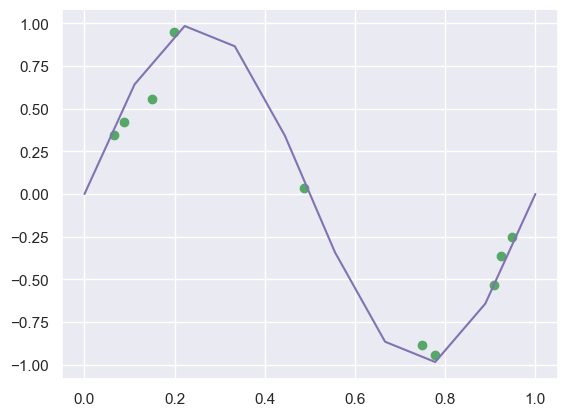

In [56]:
alpha = 0.05
beta = 1.1
M = 9

means = np.array(list(map(lambda x: mean(alpha, beta, x, x_train, y_train, M), x_test)))
variances = np.array(list(map(lambda x: variance(alpha, beta, x, x_train, y_train, M), x_test)))

plt.plot(x_train, y_train, 'og')
plt.plot(x_test, y_test, '-m')
plt.plot(x_test, means, '-b')
plt.fill_between(x_test, means + variances, means - variances, color='red', alpha='0.3')